In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import RegularGridInterpolator,interp1d
#from camminapy import kitcolorscheme
import kitcolors as kit 


In [3]:
data = np.loadtxt("data/rhofinal.txt",delimiter=",")
data = data[2:-2,2:-2]
ny,nx = data.shape
ls = np.loadtxt("exactLineSource.txt",delimiter=",")
ls[0,0] = -2.5
ls[-1,0] = 2.5

/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:126: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


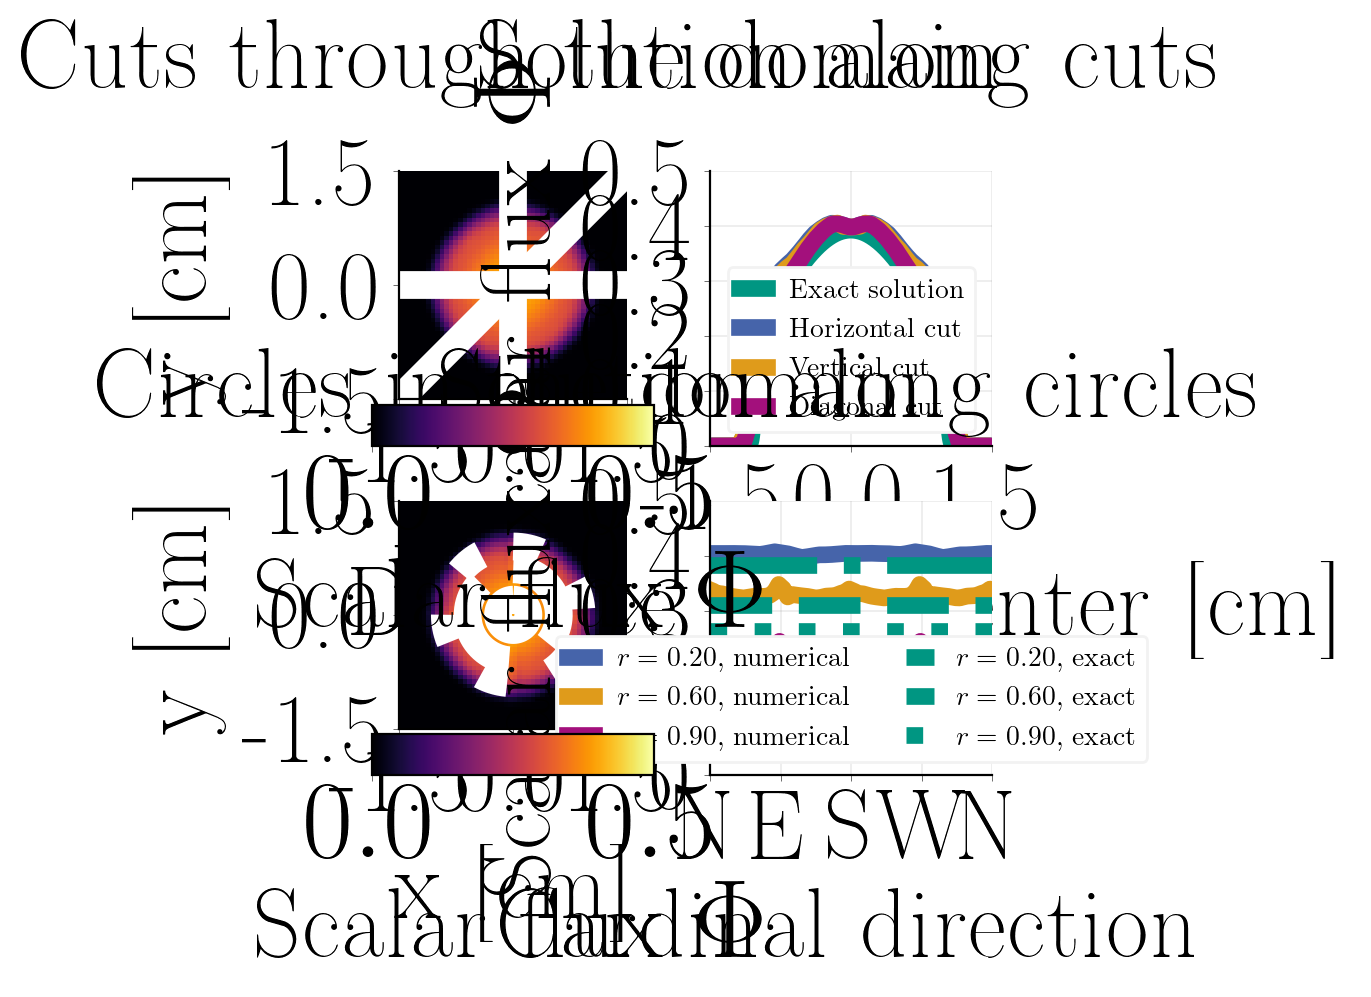

In [9]:
fs = 40
lw = 10
lwfine = 6
X = np.linspace(-1.5,1.5,nx+1)
Y = np.linspace(-1.5,1.5,ny+1)

plt.style.use("kitish")
fig,axs = plt.subplots(2,2,figsize=(4,4))

####################### UPPER LEFT
ax = axs[0,0]
pcm = ax.pcolormesh(X,Y,data,cmap = "inferno",vmin=0,vmax = 0.5)
cbar = fig.colorbar(pcm, ax=ax,orientation="horizontal")
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r"Scalar flux $\Phi$",fontsize = fs)
ax.set_aspect('equal', 'box')
ax.set_xlim([X[0],X[-1]])
ax.set_ylim([Y[0],Y[-1]])
ax.set_xticks([-1.5,0.0,1.5])
ax.set_yticks([-1.5,0.0,1.5])
ax.set_xticklabels([-1.5,0.0,1.5],fontsize=fs)
ax.set_yticklabels([-1.5,0.0,1.5],fontsize=fs)
ax.set_xlabel("x [cm]",fontsize=fs)
ax.set_ylabel("y [cm]",fontsize=fs)
ax.set_title("Cuts through the domain",fontsize = 1.5*fs, pad = 30)
ax.plot([-1.5,+1.5],[-1.5,+1.5],"-w",linewidth = lw)
ax.plot([-1.5,+1.5],[0.,0.], "-w",linewidth = lw)
ax.plot([0,0.],[-1.5,+1.5], "-w",linewidth = lw)

####################### LOWER LEFT
ax = axs[1,0]
pcm = ax.pcolormesh(X,Y,data,cmap = "inferno",vmin=0,vmax = 0.5)
cbar = fig.colorbar(pcm, ax=ax,orientation="horizontal")
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r"Scalar flux $\Phi$",fontsize = fs)
ax.set_aspect('equal', 'box')
ax.set_xlim([X[0],X[-1]])
ax.set_ylim([Y[0],Y[-1]])
ax.set_xticks([-1.5,0.0,1.5])
ax.set_yticks([-1.5,0.0,1.5])
ax.set_xticklabels([-1.5,0.0,1.5],fontsize=fs)
ax.set_yticklabels([-1.5,0.0,1.5],fontsize=fs)
ax.set_xlabel("x [cm]",fontsize=fs)
ax.set_ylabel("y [cm]",fontsize=fs)
ax.set_title("Circles in the domain",fontsize = 1.5*fs, pad = 30)
alpha = np.linspace(0,2*np.pi,1000)
rad = np.ones(1000)
for r,style in zip([0.2,0.6,0.9],["-.w","--w",":w"]):
    ax.plot(np.sin(alpha)*rad*r, np.cos(alpha)*rad*r,style,linewidth = lw)
    

####################### UPPER RIGHT

kitcolors = {"green":kit.green,"orange":kit.orange,"lila":kit.purple,"blue":kit.blue}

ax = axs[0,1]
ax.plot(ls[:,0],ls[:,1],color=kitcolors["green"],linewidth = lwfine)
ax.set_xlim([X[0],X[-1]])
ax.set_ylim([0,0.5])
ax.set_xticks([-1.5,0.0,1.5])
ax.set_xticklabels([-1.5,0.0,1.5],fontsize=fs)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5],fontsize=fs)
ax.set_xlabel(r"Distance from center [cm]",fontsize=fs)
ax.set_ylabel(r"Scalar flux $\Phi$",fontsize=fs)
ax.set_title("Solution along cuts",fontsize = 1.5*fs, pad = 30)

center_x = (X[1:]+X[:-1])/2
center_y = (Y[1:]+Y[:-1])/2
values = np.zeros((1000,4))
my_interpolating_function = RegularGridInterpolator((center_x, center_y), data,fill_value = 0.0)

for i,y in enumerate(np.linspace(-1.4,1.4,1000)):
    values[i,0] = y
    values[i,1] = my_interpolating_function(np.array([y,0]))
    values[i,2] = my_interpolating_function(np.array([0,y]))
    values[i,3] = my_interpolating_function(np.array([y,y]))
for i,color,style in zip(range(1,4),["blue","orange","lila"],["-","-","-"]):
    scale = 1 if i<3 else np.sqrt(2)
    ax.plot(scale*values[:,0],values[:,i],lw = lwfine,linestyle = style, color = kitcolors[color])
ax.legend(["Exact solution","Horizontal cut","Vertical cut","Diagonal cut"],loc ="lower center",fancybox=True, framealpha=1.0)




####################### LOWER RIGHT
ax = axs[1,1]
ax.set_xlim([0,2*np.pi])
ax.set_ylim([0,0.5])
ax.set_xticks([0,0.5*np.pi,1*np.pi,1.5*np.pi,2*np.pi])
ax.set_xticklabels(["N","E","S","W","N"],fontsize=fs)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5],fontsize=fs)

ax.set_xlabel(r"Cardinal direction",fontsize=fs)
ax.set_ylabel(r"Scalar flux $\Phi$",fontsize=fs)
ax.set_title("Solution along circles",fontsize = 1.5*fs, pad = 30)

center_x = (X[1:]+X[:-1])/2
center_y = (Y[1:]+Y[:-1])/2
values = np.zeros((1000,4))
my_interpolating_function = RegularGridInterpolator((center_x, center_y), data,fill_value = 0.0)
exact = np.zeros(3)
for i,r,style in zip([1,2,3],[0.2,0.6,0.9],["-.w","--w",":w"]):
    alpha = np.linspace(0,2*np.pi,1001)[1:]
    values[:,0] = alpha
    points = np.zeros((1000,2))
    points[:,0] = r*np.sin(alpha)
    points[:,1] = r*np.cos(alpha)
    values[:,i] = my_interpolating_function(points)
    f = interp1d(ls[:,0], ls[:,1])
    exact[i-1] = f(r)
    
for i,color,style in zip(range(1,4),["blue","orange","lila"],["-.","--",":"]):
    ax.plot(values[:,0],values[:,i],lw = lwfine,linestyle = "-", color = kitcolors[color])
    #ax.plot([0,2*np.pi],[exact[i-1],exact[i-1]],lw = lwfine,linestyle = style, color = "g")
for i,style in zip(range(1,4),["-.","--",":"]):
    #ax.plot(values[:,0],values[:,i],lw = lwfine,linestyle = "-", color = color)
    ax.plot([0,2*np.pi],[exact[i-1],exact[i-1]],lw = lwfine,linestyle = style, color = kitcolors["green"])
    
ax.legend([r"$r={:.2f}$, numerical".format(0.2), r"$r={:.2f}$, numerical".format(0.6),r"$r={:.2f}$, numerical".format(0.9),
           r"$r={:.2f}$, exact".format(0.2),r"$r={:.2f}$, exact".format(0.6),r"$r={:.2f}$, exact".format(0.9)]    ,
          loc ="lower center",fancybox=True, framealpha=1.0,ncol=2)

plt.tight_layout()
plt.savefig("summary.png",dpi = 100)



/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


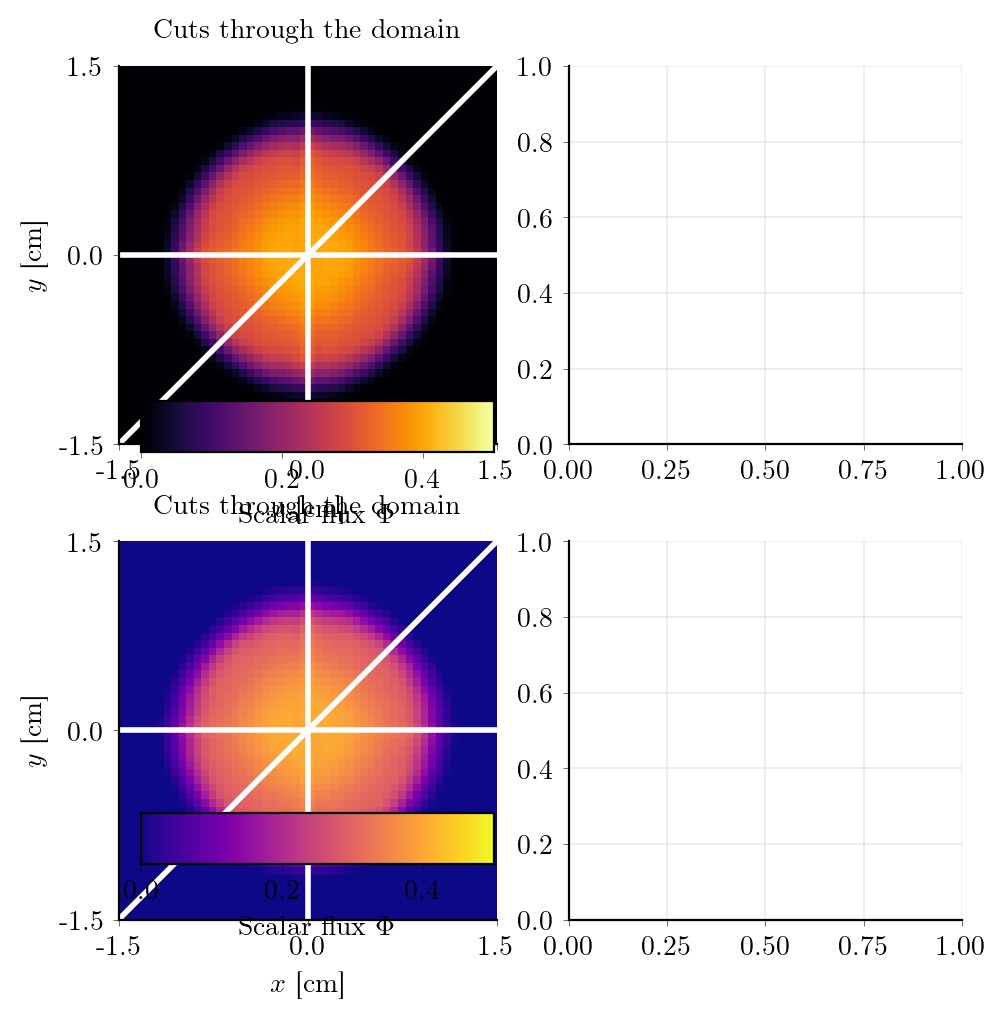

In [17]:
X = np.linspace(-1.5,1.5,nx+1)
Y = np.linspace(-1.5,1.5,ny+1)

plt.style.use("kitish")
fig,axs = plt.subplots(2,2,figsize=(5,5))

####################### UPPER LEFT
ax = axs[0,0]
pcm = ax.pcolormesh(X,Y,data,cmap = "inferno",vmin=0,vmax = 0.5)
cbar = fig.colorbar(pcm, ax=ax,orientation="horizontal")
cbar.set_label(r"Scalar flux $\Phi$")
ax.set_aspect('equal', 'box')
ax.set_xlim([X[0],X[-1]])
ax.set_ylim([Y[0],Y[-1]])
ax.set_xticks([-1.5,0.0,1.5])
ax.set_yticks([-1.5,0.0,1.5])
ax.set_xticklabels([-1.5,0.0,1.5])
ax.set_yticklabels([-1.5,0.0,1.5])
ax.set_xlabel(r"$x$ [cm]")
ax.set_ylabel(r"$y$ [cm]")
ax.set_title("Cuts through the domain")
ax.plot([-1.5,+1.5],[-1.5,+1.5],"-w")
ax.plot([-1.5,+1.5],[0.,0.], "-w")
ax.plot([0,0.],[-1.5,+1.5], "-w")
####################### UPPER LEFT
ax = axs[1,0]
pcm = ax.pcolormesh(X,Y,data,cmap = "plasma",vmin=0,vmax = 0.5)
cbar = fig.colorbar(pcm, ax=ax,orientation="horizontal")
cbar.set_label(r"Scalar flux $\Phi$")
ax.set_aspect('equal', 'box')
ax.set_xlim([X[0],X[-1]])
ax.set_ylim([Y[0],Y[-1]])
ax.set_xticks([-1.5,0.0,1.5])
ax.set_yticks([-1.5,0.0,1.5])
ax.set_xticklabels([-1.5,0.0,1.5])
ax.set_yticklabels([-1.5,0.0,1.5])
ax.set_xlabel(r"$x$ [cm]")
ax.set_ylabel(r"$y$ [cm]")
ax.set_title("Cuts through the domain")
ax.plot([-1.5,+1.5],[-1.5,+1.5],"-w")
ax.plot([-1.5,+1.5],[0.,0.], "-w")
ax.plot([0,0.],[-1.5,+1.5], "-w")


plt.tight_layout()
plt.savefig("summary.png",dpi = 100)

